<a href="https://colab.research.google.com/github/ckurtz/teaching_UPC_UFRMI/blob/main/selfsupervised_demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References

[Course Webpage](https://sites.google.com/view/berkeley-cs294-158-sp20/home)

[1] Pathak, Deepak, et al. "Context encoders: Feature learning by inpainting." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[2] Gidaris, Spyros, Praveer Singh, and Nikos Komodakis. "Unsupervised representation learning by predicting image rotations." arXiv preprint arXiv:1803.07728 (2018).

[3] Chen, Ting, et al. "A simple framework for contrastive learning of visual representations." arXiv preprint arXiv:2002.05709 (2020).

[4] Noroozi, Mehdi, and Paolo Favaro. "Unsupervised learning of visual representations by solving jigsaw puzzles." European Conference on Computer Vision. Springer, Cham, 2016.

[5] Wang, Xiaolong, Allan Jabri, and Alexei A. Efros. "Learning correspondence from the cycle-consistency of time." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.

[6] Oord, Aaron van den, Yazhe Li, and Oriol Vinyals. "Representation learning with contrastive predictive coding." arXiv preprint arXiv:1807.03748 (2018).

[7] Hénaff, Olivier J., et al. "Data-efficient image recognition with contrastive predictive coding." arXiv preprint arXiv:1905.09272 (2019).

[8] Tian, Yonglong, Dilip Krishnan, and Phillip Isola. "Contrastive multiview coding." arXiv preprint arXiv:1906.05849 (2019).

[9] He, Kaiming, et al. "Momentum contrast for unsupervised visual representation learning." arXiv preprint arXiv:1911.05722 (2019).

[10] Doersch, Carl, Abhinav Gupta, and Alexei A. Efros. "Unsupervised visual representation learning by context prediction." Proceedings of the IEEE International Conference on Computer Vision. 2015.

[11] Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

# Getting Started
Go to **Runtime -> Change runtime type** and make sure **Hardward accelerator** is set to **GPU**

In [1]:
!if [ -d cs294-158-ssl ]; then rm -Rf cs294-158-ssl; fi
!git clone https://github.com/ckurtz/cs294-158-ssl
!pip install cs294-158-ssl/

import os
os.chdir('cs294-158-ssl')

Cloning into 'cs294-158-ssl'...
remote: Enumerating objects: 615, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 615 (delta 92), reused 90 (delta 90), pack-reused 517 (from 1)
Receiving objects: 100% (615/615), 3.10 MiB | 35.29 MiB/s, done.
Resolving deltas: 100% (442/442), done.
Processing ./cs294-158-ssl
  Preparing metadata (setup.py) ... done
  Created wheel for deepul_helper: filename=deepul_helper-0.1.0-py3-none-any.whl size=25320 sha256=b9b0266974d117e3bea2841b4012bff9bd63f8504b4acf275f324db67a7d4ad7
  Stored in directory: /root/.cache/pip/wheels/89/df/de/2522718f33fc5fb5d513646711c5929b728d06ba7f1c0aaaae
Successfully built deepul_helper


Run the cells below to download the necessary pretrained models. It should take a few minutes.

In [2]:
!wget https://camille-kurtz.com/teaching/data.zip
!unzip -qq data.zip
!rm data.zip

--2025-11-02 18:13:11--  https://camille-kurtz.com/teaching/data.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4227668031 (3.9G) [application/zip]
Saving to: ‘data.zip’

data.zip             51%[=========>          ]   2.02G  12.6MB/s    in 3m 1s   

2025-11-02 18:16:52 (11.5 MB/s) - Connection closed at byte 2172687784. Retrying.

--2025-11-02 18:16:53--  (try: 2)  https://camille-kurtz.com/teaching/data.zip
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 504 Gateway Time-out
Retrying.

--2025-11-02 18:17:56--  (try: 3)  https://camille-kurtz.com/teaching/data.zip
Reusing existing connection to camille-kurtz.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 4227668031 (3.9G) [application/zip]
Saving to: ‘data.zip’

data.zip            100

In [3]:
!wget https://camille-kurtz.com/teaching/results.zip
!unzip -qq results.zip
!rm results.zip

--2025-11-02 18:24:01--  https://camille-kurtz.com/teaching/results.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2636425194 (2.5G) [application/zip]
Saving to: ‘results.zip’

results.zip         100%[===================>]   2.46G  13.7MB/s    in 3m 28s  

2025-11-02 18:27:30 (12.1 MB/s) - ‘results.zip’ saved [2636425194/2636425194]



The models and demos shown were pre-trained. The code used for all the demos can be found in the github repo [here](https://github.com/wilson1yan/cs294-158-ssl). Follow the README to train models on CIFAR10 or ImageNet.

# Self-Supervised Learning Tasks
Self-supervised learning is a rapidly growing field, its success largely accelerated by growing compute and the vast amount of unlabeled data available for training. The hope is that by pretraining on specially designed self-supervised tasks, the models would be able to learn semantically meaningful representations to be used for downstream tasks. In the following demos, we will look at a few examples of these self-supervised tasks.

In [4]:
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting

%matplotlib inline

## Demo 1: Context Encoder [[1]](https://arxiv.org/abs/1604.07379)

The context encoder structures its self-supervised learning task by inpainting masked images. For example, the figure below shows different masking shapes, such as center masking, random block masking, and segmentation masking. Note that segmentation masking (c) is not purely self-supervised since we would need to train a image segmentation model which requires labels. However, the other two masking schemes (a) and (b) and purely self-supervised.

![](https://drive.google.com/uc?id=1fhzkULYTtyMGUUF2n9dlPayJSdcY5pRv)

More formally, the context encoder optimizes the following reconstruction loss:
$$\mathcal{L}_{rec} = \left\Vert \hat{M} \odot (x - F((1 - \hat{M})\odot x)) \right\Vert^2_2$$
where $\hat{M}$ is the masked region, $x$ is the image, and $F$ is the context encoder that tries to reconstruct the masked portion. In addition to the reconstruction loss, the paper introduces an adversarial loss that encourages more realistic inpaintings.
$$L_{adv} = \max_D \mathbb{E}_{x\in \chi} [\log(D(x)) + \log(1 - D(F((1-\hat{M})\odot x)))]$$
However, this demo does not use the adversarial portion of the loss.

### Example Code

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContextEncoder(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes):
        super().__init__()
        input_channels = 3

        self.latent_dim = 4000

        # Encodes the masked image
        self.encoder = nn.Sequential(
            # 128 x 128 Input
            nn.Conv2d(input_channels, 64, 4, stride=2, padding=1), # 64 x 64
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 4, stride=2, padding=1), # 32 x 32
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 16 x 16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1), # 8 x 8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1), # 4 x 4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, self.latent_dim, 4) # 1 x 1
        )

        # Only reconstructs the masked part of the image and not the whole image
        self.decoder = nn.Sequential(
           nn.BatchNorm2d(self.latent_dim),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(self.latent_dim, 512, 4, stride=1, padding=0), # 4 x 4
           nn.BatchNorm2d(512),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1), # 8 x 8
           nn.BatchNorm2d(256),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1), # 16 x 16
           nn.BatchNorm2d(128),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), # 32 x 32
           nn.BatchNorm2d(64),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(64, input_channels, 4, stride=2, padding=1), # 64 x 64
           nn.Tanh()
        )

        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        classifier = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(self.latent_dim, affine=False),
            nn.Linear(self.latent_dim, self.n_classes)
        )
        return classifier

    def forward(self, images):
        # Extract a 64 x 64 center from 128 x 128 image
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        # Mask out a 64 x 64 center with slight overlap
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        return dict(Loss=F.mse_loss(center_recon, images_center)), torch.flatten(z, 1)

    def encode(self, images):
        images_masked = images
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0
        return self.encoder(images_masked)

    def reconstruct(self, images):
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        images_masked[:, 0, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        images_recon = images_masked.clone()
        images_recon[:, :, 32:32+64, 32:32+64] = center_recon
        return images_masked, images_recon


### Inpainting Examples
For each pair of images, the left image is the masked input and the right the inpainted reconstruction.

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


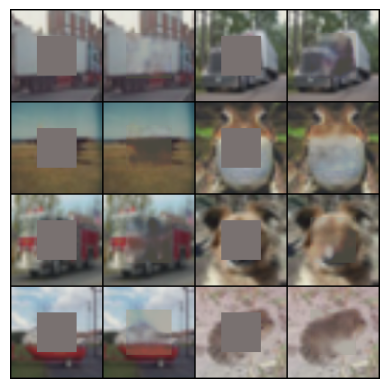

In [6]:
show_context_encoder_inpainting()

### Linear Classification
By design the model architecture is an encoder -> decoder module. We can use the bottleneck layer as our learned representation. Below, we show linear classification accuracy results on CIFAR10 using the learned representations.

In [7]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Train Set
Top 1 Accuracy: 53.236, Top 5 Accuracy: 94.094

Test Set
Top 1 Accuracy: 45.77, Top 5 Accuracy: 90.29



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


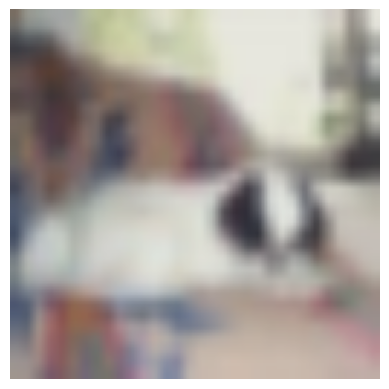

Top 16 Nearest Neighbors (in latent space)


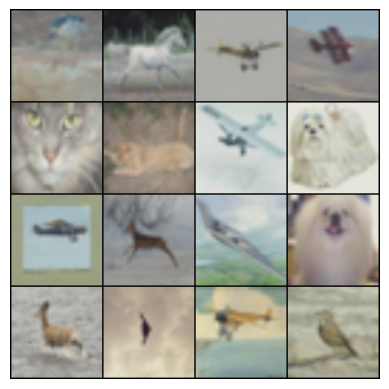

Image 2


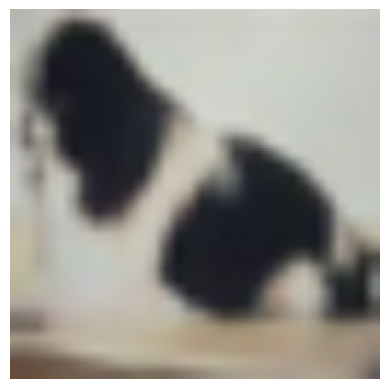

Top 16 Nearest Neighbors (in latent space)


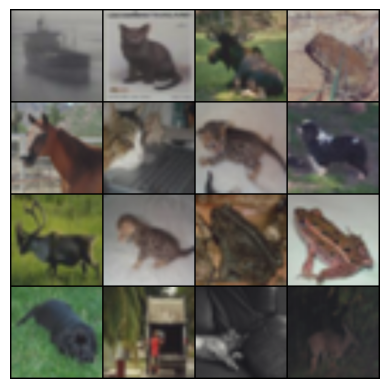

Image 3


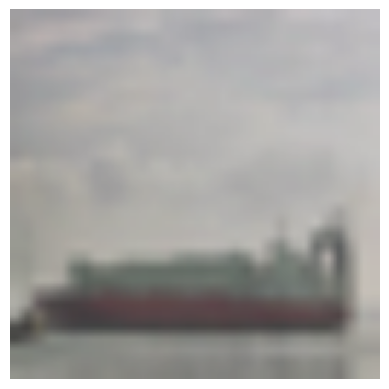

Top 16 Nearest Neighbors (in latent space)


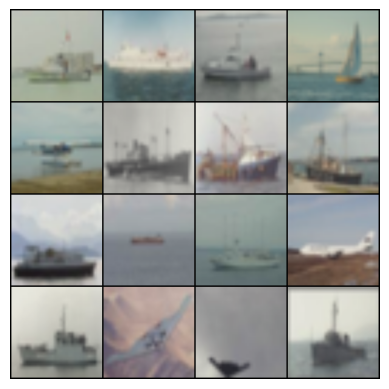

Image 4


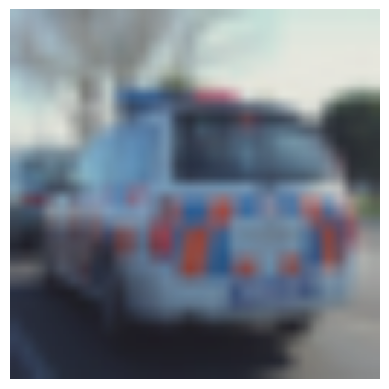

Top 16 Nearest Neighbors (in latent space)


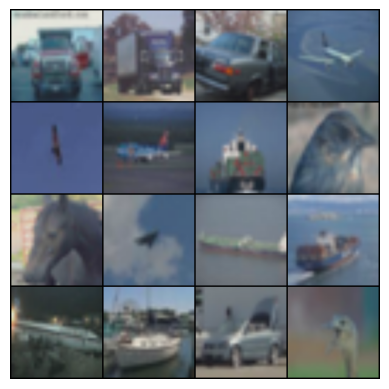

In [8]:
display_nearest_neighbors('context_encoder', model, test_loader)

## Demo 2: Rotation Prediction [[2]](https://arxiv.org/abs/1803.07728)

In this paper, the authors show that accurately predicting the degrees of rotation in images is a self-supervised learning task that learns good representations for downstream tasks.

![](https://drive.google.com/uc?id=1eHXLH-N_6uMGRzdf1Wjnga26qlS5-FRv)

More specifically, the authors showed that training a common CNN architecture (AlexNet, ResNet) on the rotation task learns semantically interpretable convolutional masks similar to those learned in supervised learning.

### Example Code

In [9]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F


class RotationPrediction(nn.Module):
    metrics = ['Loss', 'Acc1']
    metrics_fmt = [':.4e', ':6.2f']

    def __init__(self, dataset, n_classes):
        super().__init__()
        if dataset == 'cifar10':
            self.model = NetworkInNetwork()
            self.latent_dim = 192 * 8 * 8
            self.feat_layer = 'conv2'
        elif 'imagenet' in dataset:
            self.model = AlexNet()
            self.latent_dim = 256 * 13 * 13
            self.feat_layer = 'conv5'
        else:
            raise Exception('Unsupported dataset:', dataset)
        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        if self.dataset == 'cifar10':
            classifier = nn.Sequential(
                Flatten(),
                nn.BatchNorm1d(self.latent_dim, affine=False),
                nn.Linear(self.latent_dim, self.n_classes)
            )
        elif 'imagenet' in self.dataset:
            classifier = nn.Sequential(
                nn.AdaptiveMaxPool2d((6, 6)),
                nn.BatchNorm2d(256, affine=False),
                Flatten(),
                nn.Linear(256 * 6 * 6, self.n_classes)
            )
        else:
            raise Exception('Unsupported dataset:', dataset)
        return classifier

    def forward(self, images):
        batch_size = images.shape[0]
        images, targets = self._preprocess(images)
        targets = targets.to(images.get_device())

        logits, zs = self.model(images, out_feat_keys=('classifier', self.feat_layer))
        loss = F.cross_entropy(logits, targets)

        pred = logits.argmax(dim=-1)
        correct = pred.eq(targets).float().sum()
        acc = correct / targets.shape[0] * 100.

        return dict(Loss=loss, Acc1=acc), zs[:batch_size]

    def encode(self, images):
        zs = self.model(images, out_feat_keys=(self.feat_layer,))
        return zs

    def _preprocess(self, images):
        batch_size = images.shape[0]
        images_90 = torch.flip(images.transpose(2, 3), (2,))
        images_180 = torch.flip(images, (2, 3))
        images_270 = torch.flip(images, (2,)).transpose(2, 3)
        images_batch = torch.cat((images, images_90, images_180, images_270), dim=0)
        targets = torch.arange(4).long().repeat(batch_size)
        targets = targets.view(batch_size, 4).transpose(0, 1)
        targets = targets.contiguous().view(-1)
        return images_batch, targets

### Linear Classification
We can use the feature maps in the later convolutional layers of the pretrained model as our learned representation for linear classification.

In [10]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Train Set
Top 1 Accuracy: 79.258, Top 5 Accuracy: 99.174

Test Set
Top 1 Accuracy: 79.91, Top 5 Accuracy: 99.12



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


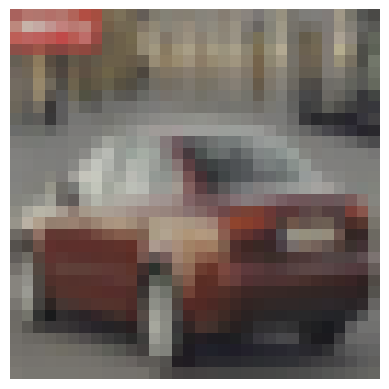

Top 16 Nearest Neighbors (in latent space)


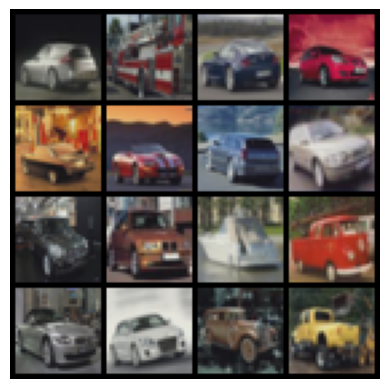

Image 2


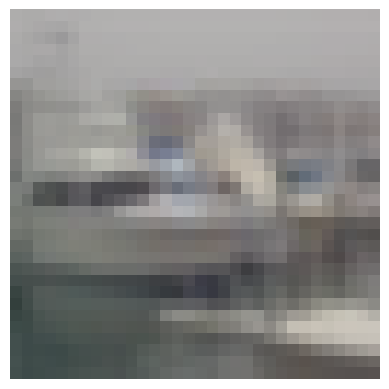

Top 16 Nearest Neighbors (in latent space)


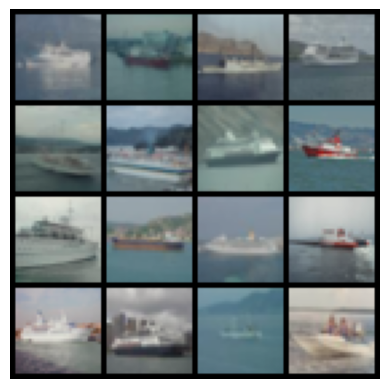

Image 3


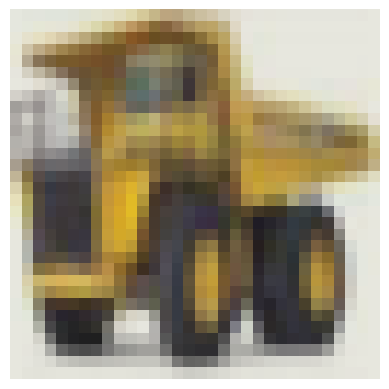

Top 16 Nearest Neighbors (in latent space)


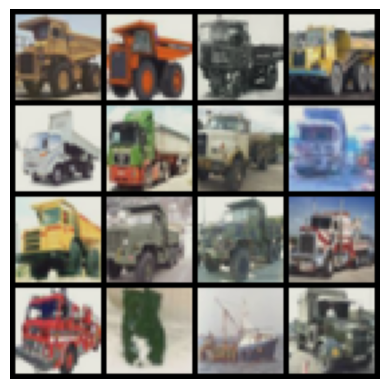

Image 4


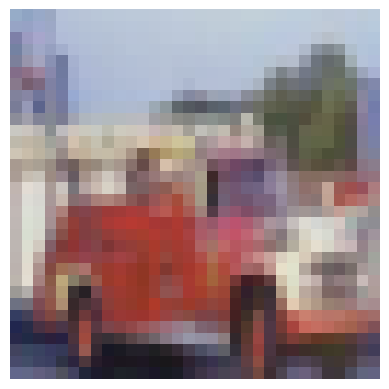

Top 16 Nearest Neighbors (in latent space)


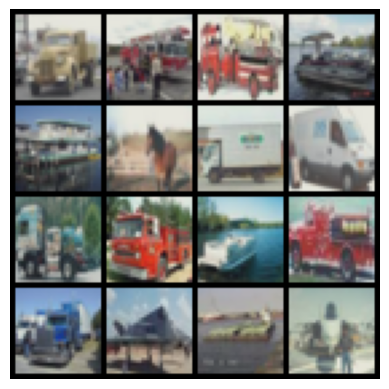

In [11]:
display_nearest_neighbors('rotation', model, test_loader)

## Demo 3: SimCLR [[3]](https://arxiv.org/abs/2002.05709)

SimCLR is a contrastive learning framework to learn strong visual representations. An image $x$ is processed using data augmentation to produce two variants $x_i$ and $x_j$ which are both fed into encoder $f$ (a CNN) and projection head $g$ (a small MLP). The models optimize a contrastive loss to maximally align projected latents $z_i, z_j$. We consider $x_i, x_j$ as a positive pair, and any other $x_i, x_k$ pairs (i.e. different images in the same batch) are negative pairs. A visual diagram of the training procedure is shown below (from the paper).

![](https://drive.google.com/uc?id=1XW1uIkUTMSa0DZncivSYXzM5gA5FIhF6)

More formally, the loss between positive example $z_i, z_j$ is:
$$\ell_{i,j} = -\log{\frac{\exp(\text{sim}(z_i, z_j)/\tau)}{\sum_{k=1}^{2N}\mathbb{1}_{[k\neq i]}\exp(\text{sim}(z_i, z_k)/\tau)}}$$
where $\text{sim}(z_i, z_j) = z_i^Tz_j / (\left\Vert z_i \right\Vert \left\Vert z_j \right\Vert)$. The loss function can also be interpreted as a standard cross entropy loss to classify positive samples where logits are constructed using a given similarity function.

Note: A common idea in contrastive learning methods is that a larger batch means more negative samples. Therefore, these methods usually benefit the most from large-batch learning compared to other self-supervised learning tasks.

### Example Code

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from deepul_helper.resnet import resnet_v1
from deepul_helper.batch_norm import SyncBatchNorm, BatchNorm1d

# Some code adapted from https://github.com/sthalles/SimCLR
class SimCLR(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes, dist=None):
        super().__init__()
        self.temperature = 0.5
        self.projection_dim = 128

        if dataset == 'cifar10':
            resnet = resnet_v1((3, 32, 32), 50, 1, cifar_stem=True)
            resnet = SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048
        elif 'imagenet' in dataset:
            resnet = resnet_v1((3, 128, 128), 50, 1, cifar_stem=False)
            if dist is not None:
                resnet = nn.SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048

        self.proj = nn.Sequential(
            nn.Linear(self.latent_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim),
            nn.ReLU(inplace=True),
            nn.Linear(self.projection_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim, center=False)
        )

        self.dataset = dataset
        self.n_classes = n_classes
        self.dist = dist

    def construct_classifier(self):
        return nn.Sequential(nn.Linear(self.latent_dim, self.n_classes))

    def forward(self, images):
        n = images[0].shape[0]
        xi, xj = images
        hi, hj = self.encode(xi), self.encode(xj) # (N, latent_dim)
        zi, zj = self.proj(hi), self.proj(hj) # (N, projection_dim)
        zi, zj = F.normalize(zi), F.normalize(zj)

        # Each training example has 2N - 2 negative samples
        # 2N total samples, but exclude the current and positive sample

        if self.dist is None:
            zis = [zi]
            zjs = [zj]
        else:
            zis = [torch.zeros_like(zi) for _ in range(self.dist.get_world_size())]
            zjs = [torch.zeros_like(zj) for _ in range(self.dist.get_world_size())]

            self.dist.all_gather(zis, zi)
            self.dist.all_gather(zjs, zj)

        z1 = torch.cat((zi, zj), dim=0) # (2N, projection_dim)
        z2 = torch.cat(zis + zjs, dim=0) # (2N * n_gpus, projection_dim)

        sim_matrix = torch.mm(z1, z2.t()) # (2N, 2N * n_gpus)
        sim_matrix = sim_matrix / self.temperature
        # Mask out same-sample terms
        n_gpus = 1 if self.dist is None else self.dist.get_world_size()
        rank = 0 if self.dist is None else self.dist.get_rank()
        sim_matrix[torch.arange(n), torch.arange(rank*n, (rank+1)*n)]  = -float('inf')
        sim_matrix[torch.arange(n, 2*n), torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n)] = -float('inf')

        targets = torch.cat((torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n),
                             torch.arange(rank*n, (rank+1)*n)), dim=0)
        targets = targets.to(sim_matrix.get_device()).long()

        loss = F.cross_entropy(sim_matrix, targets, reduction='sum')
        loss = loss / n
        return dict(Loss=loss), hi

    def encode(self, images):
        return self.resnet(images[0])

    def get_features(self, images):
        return self.resnet.get_features(images)


### Linear Classification
We can use the encoded vector $h_i$ as our latent representation.

In [13]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Train Set
Top 1 Accuracy: 89.982, Top 5 Accuracy: 99.452

Test Set
Top 1 Accuracy: 92.84, Top 5 Accuracy: 99.86



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


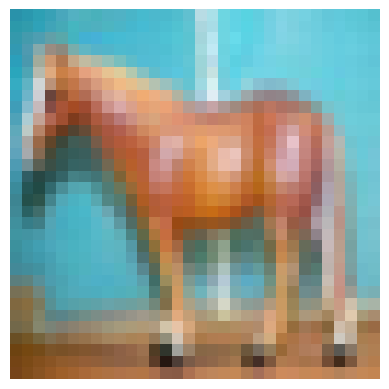

Top 16 Nearest Neighbors (in latent space)


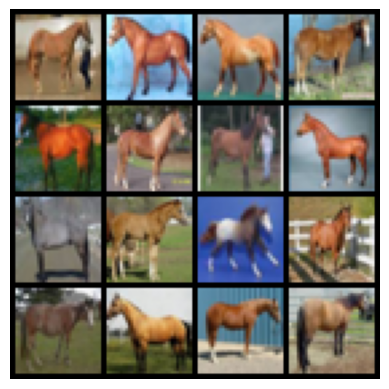

Image 2


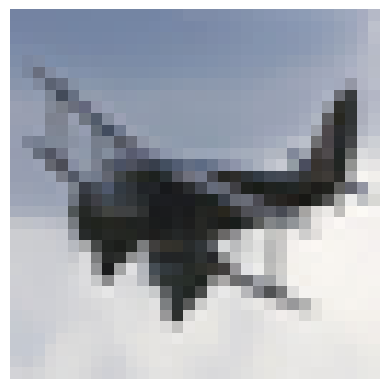

Top 16 Nearest Neighbors (in latent space)


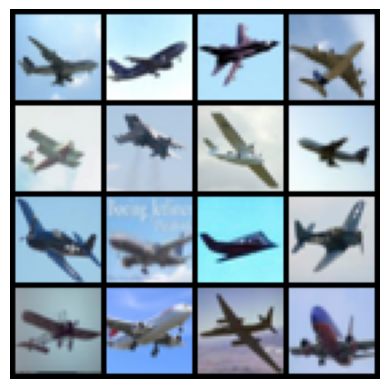

Image 3


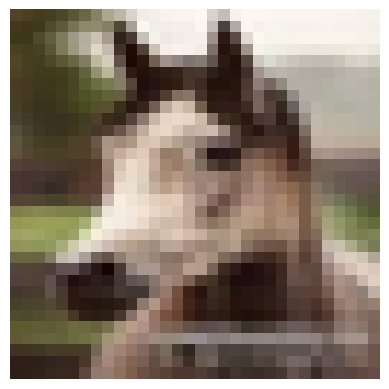

Top 16 Nearest Neighbors (in latent space)


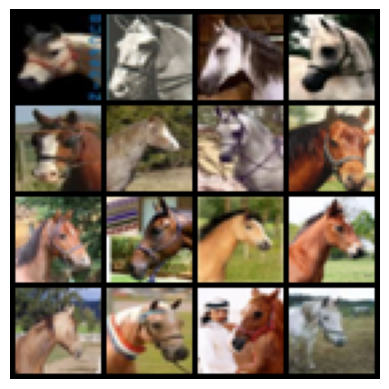

Image 4


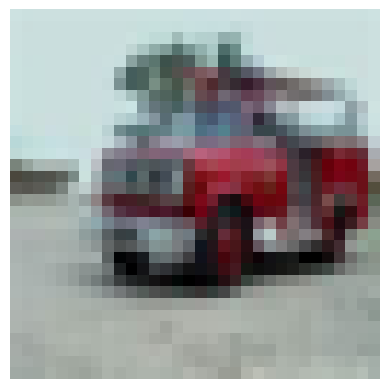

Top 16 Nearest Neighbors (in latent space)


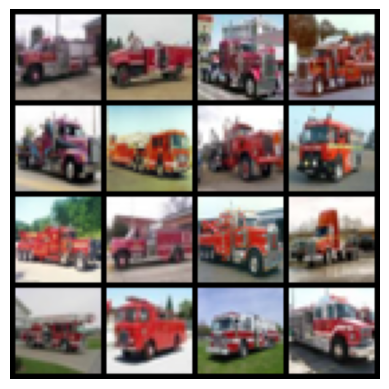

In [14]:
display_nearest_neighbors('simclr', model, test_loader)

## Other Tasks
In addition to the above tasks, prior work has also investigated other self-superivsed tasks such as solving jigsaw puzzles [[4]](https://arxiv.org/abs/1603.09246), cycle-consistency [[5]](https://arxiv.org/abs/1903.07593), contrastive learning [[6]](https://arxiv.org/abs/1807.03748)[[7]](https://arxiv.org/abs/1905.09272)[[8]](https://arxiv.org/abs/1906.05849)[[9]](https://arxiv.org/abs/1911.05722), and patch prediction [[10]](https://arxiv.org/abs/1505.05192). See [here](https://github.com/jason718/awesome-self-supervised-learning) for a great resource on more self-supervised learning papers.

# Demo 4: Using Representations for Downstream Tasks

After pretraining a model on a self-supervised learning task, we can use it for other downstream tasks. In this demo, we use the pre-trained ResNet50 backbone from training SimCLR on a subset of ImageNet to learn a semantic segmentation model on Pascal VOC 2012. We use a simple U-Net [[11]](https://arxiv.org/abs/1505.04597) architecture with skip connections across feature maps between the SimCLR encoder and learned upsampling decoder. We do not fine-tune the SimCLR ResNet50 backbone, and only optimize the upsampling portion.

![](https://drive.google.com/uc?id=19dxxcwof0IA0jyv0VCl4rnZZf3ajA22s)

The training script can be found in `train_segmentation.py` [here](https://github.com/wilson1yan/cs294-158-ssl/blob/master/train_segmentation.py).

## Example Code

In [15]:
# Code adapted from https://github.com/qubvel/segmentation_models.pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
from deepul_helper.resnet import NormReLU

class SegmentationModel(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, n_classes):
        super().__init__()

        decoder_channels = (512, 256, 128, 64, 32)
        encoder_channels = (2048, 1024, 512, 256, 64) # Starting from head (resnet 50)

        # Construct decoder blocks
        in_channels = [encoder_channels[0]] + list(decoder_channels[:-1])
        skip_channels = list(encoder_channels[1:]) + [0]
        out_channels = decoder_channels
        blocks = [
            DecoderBlock(in_ch, skip_ch, out_ch)
            for in_ch, skip_ch, out_ch in zip(in_channels, skip_channels, out_channels)
        ]
        self.dec_blocks = nn.ModuleList(blocks)

        # Segmentation head for output prediction
        self.seg_head = nn.Conv2d(decoder_channels[-1], n_classes, kernel_size=3, padding=1)

    def forward(self, features, targets):
        features = features[1:] # remove first skip with same spatial resolution
        features = features[::-1] # reverse channels to start from head of encoder

        skips = features[1:]
        x = features[0]
        for i, decoder_block in enumerate(self.dec_blocks):
            skip = skips[i] if i < len(skips) else None
            x = decoder_block(x, skip)

        logits = self.seg_head(x)
        loss = F.cross_entropy(logits, targets)

        return dict(Loss=loss), logits


class DecoderBlock(nn.Module):
    def __init__(
            self,
            in_channels,
            skip_channels,
            out_channels,
    ):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels + skip_channels, out_channels,
                      kernel_size=3, padding=1),
            NormReLU((out_channels, None, None)), # only care about channel dim for BN
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            NormReLU((out_channels, None, None))
        )

    def forward(self, x, skip=None):
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        if skip is not None:
            x = torch.cat([x, skip], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

## Segmentation Results
Below, we show a random subset of segmentations from the trained model. Every set of 3 images consists of the original image, the labeled segmentation, and the predicted segmentation.

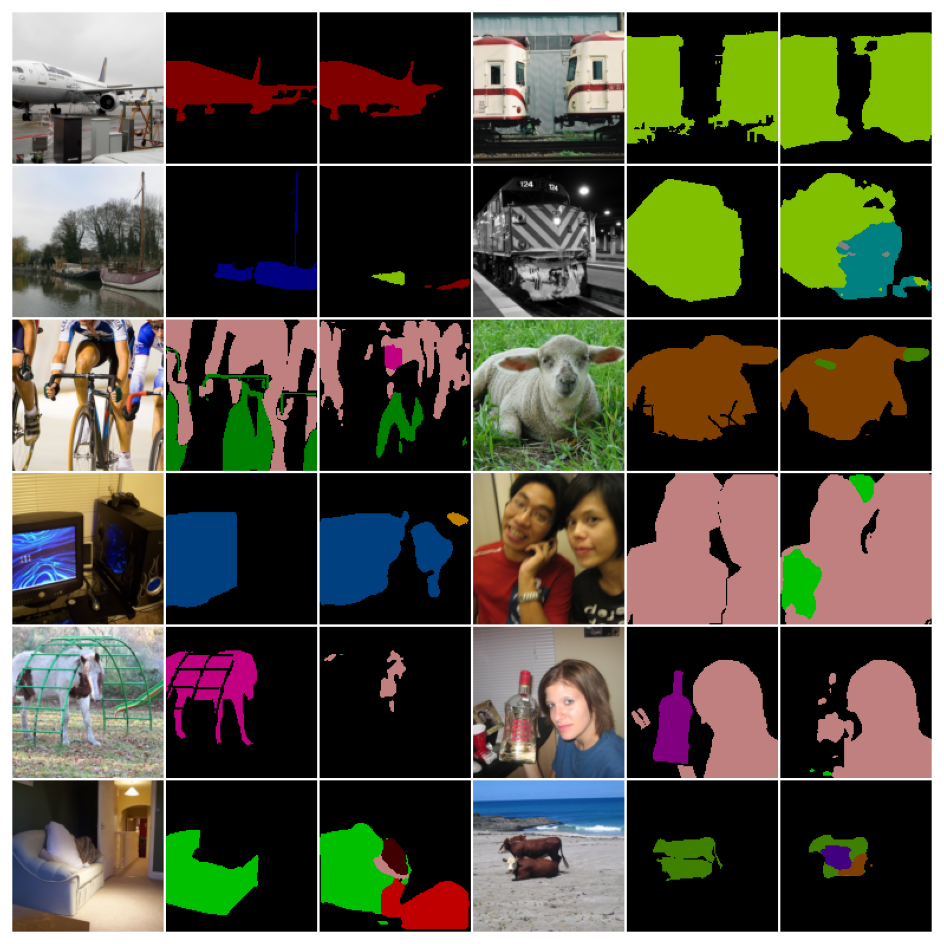

In [16]:
from deepul_helper.demos import show_segmentation
show_segmentation()

# Demo 5: Avoiding Trivial Representations in Self-Supervised Tasks

When designing a self-supervised learning task, it is important to make sure that no trivial solutions exists. In general, a learned solution is trivial if the model is able to successfully complete its task by taking advantage of low-level features. As a result, it doesn't learn a good representation so downstream performance is bad.

For example, in the jigsaw [[4]](https://arxiv.org/abs/1603.09246) task, a model can "cheat" by just looking at the boundary textures of the jigsaw pieces, or following and matching straight lines across different pieces. These issues can generally be fixed by ranndom cropping, shifting, and spacially jittering.

We look at two other less obvious aspects of images that may reduce performance.

## Chromatic Aberration

Chromatic aberration occurs when the different focal lengths of light results in the light not meeting all at the same point.
![from wikipedia](https://drive.google.com/uc?id=1PYGoQWnH0aAeiE_8t4ef5WDcq1UIQQ5t)

A example of very apparent chromatic aberration is shown below, where the green and magenta colors are clearly offset with each other:

![](https://drive.google.com/uc?id=1M1B6kV6ddBwyJse3FQT8_XBTeqs5s5WL)

Chromatic aberration generally becomes a problem in patch-based self-supervised learning tasks that design, such as solving jigsaw puzzles, or predicintg the correct location of a patch in an image In this case, the model can take advantage of the low-level chromatic aberration features to get a strong idea of where the patch is located without understanding the actual context.

Below is a quick demo of chromatic aberration in more realistic images, and possible fixes. Note that in general, chromatic aberration is fairly hard to spot with the naked eye, but deep learning models are still able to use it to their advantage.

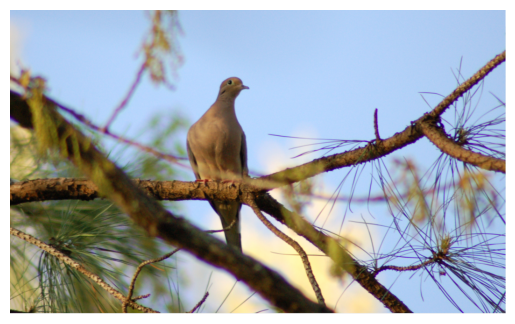

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# You can see some chromatic aberration in the purple fringes around the branches

image = Image.open('sample_images/chrom_ab_demo.png')
plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

Chromatic aberration is generally fixed through conversion to grayscale, or color dropping. Color dropping works by dropping 2 of the color channels and replacing them with random noise uniform or Gaussian noise.

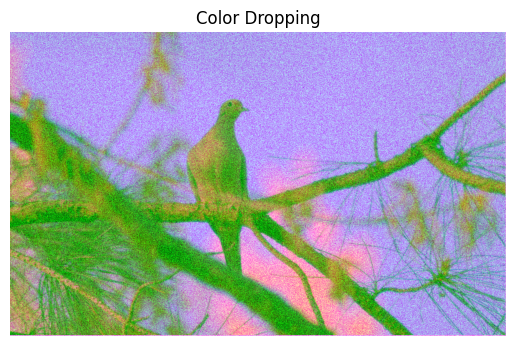

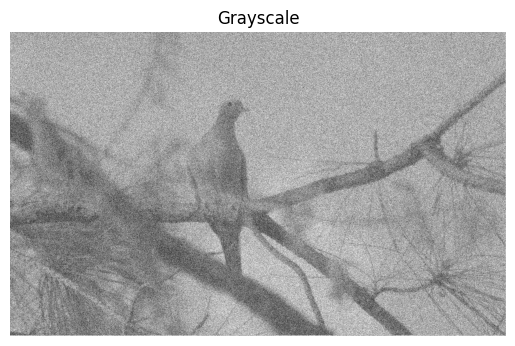

In [18]:
import numpy as np

# Color Dropping
# We will drop all channels except R
image_cpy = image.copy()
pixels = image_cpy.load()

arr = np.array(image_cpy)
std_R = np.std(arr[:, :, 0])
mean_G, mean_B = np.mean(arr[:, :, 1]), np.mean(arr[:, :, 2])

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j] # (R, G, B, A)
    R, A = p[0], p[3]
    G = int(np.random.randn() * std_R + mean_G)
    B = int(np.random.randn() * std_R + mean_B)
    pixels[i, j] = (R, G, p[2], p[3])

plt.figure()
plt.title('Color Dropping')
plt.axis('off')
plt.imshow(image_cpy)
plt.show()

# Grayscale
image_cpy2 = image.copy()
pixels2 = image_cpy2.load()

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j]
    G = int(0.3 * p[0] + 0.59 * p[1] + 0.11 * p[2])
    pixels2[i, j] = (G, G, G, 255)

plt.figure()
plt.title('Grayscale')
plt.axis('off')
plt.imshow(image_cpy2)
plt.show()

## Color Intensity Histograms

In the SimCLR paper, the authors show that the histogram of color intensities of different patches within the same image have very similar histograms, which may degrade training by encouraging models to look at low-level (pixel intensity) features to solve self-supervised tasks that involve matching positive patches of the same image.

Below, we run a similar demo to what was demonstrated in the paper

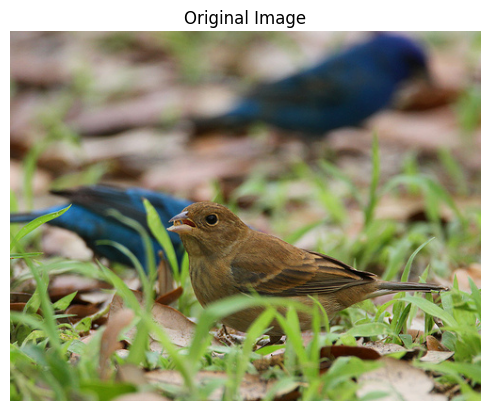

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Original Image')
plt.axis('off')
plt.imshow(image)
plt.show()

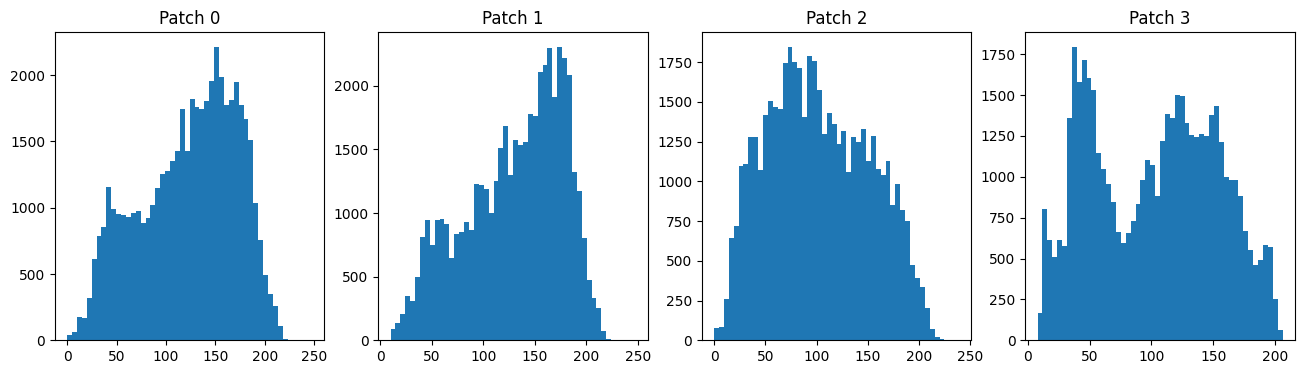

In [20]:
import numpy as np
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

Now we apply color jittering to mitigate this effect

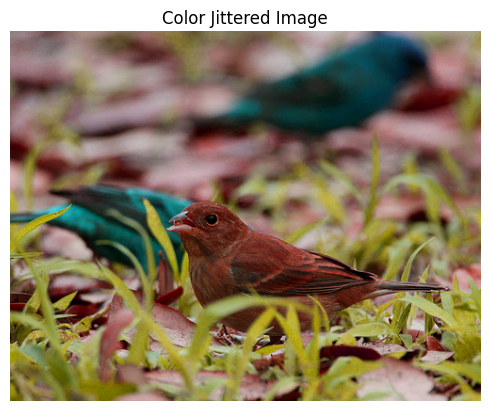

In [21]:
from torchvision import transforms

color_jitter = transforms.ColorJitter(0.3, 0.3, 0.3, 0.3)
jitter_img = color_jitter(image)

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Color Jittered Image')
plt.axis('off')
plt.imshow(jitter_img)
plt.show()

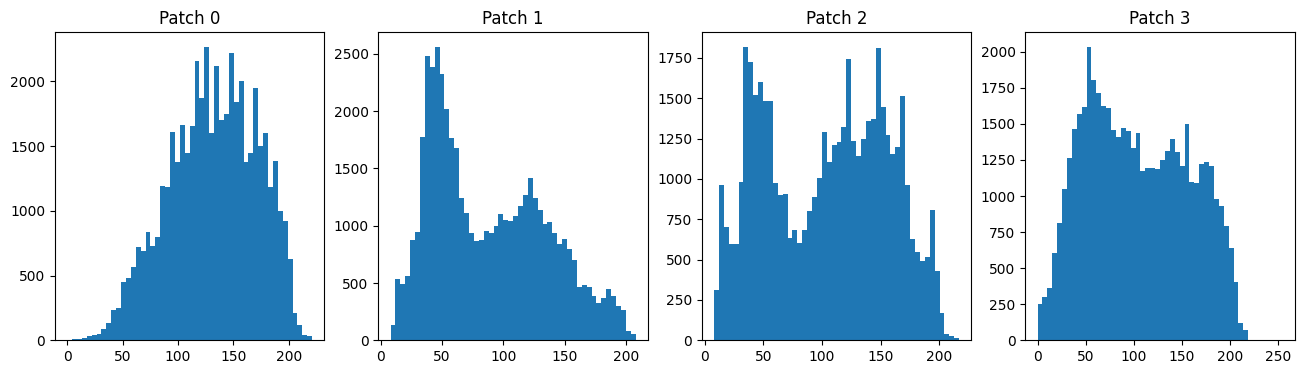

In [22]:
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

# QUESTION 3: Comparaison des performances de tous les modèles

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from deepul_helper.demos import evaluate_classifier

In [25]:
def compare_all_models():
    print("=" * 25)
    print("COMPARAISON")
    print("=" * 25)

    models_info = {
        'context_encoder': 'Context Encoder (Inpainting)',
        'rotation': 'Rotation Prediction',
        'simclr': 'SimCLR (Contrastive)'
    }

    results = []

    for model_name, model_display_name in models_info.items():
        print(f"\n--- {model_display_name} ---")

        model, linear_classifier, train_loader, test_loader = load_model_and_data(model_name)

        # use evaluate_classifier to return actual accuracy values
        train_acc1, train_acc5 = evaluate_classifier(model, linear_classifier, train_loader)
        test_acc1, test_acc5 = evaluate_classifier(model, linear_classifier, test_loader)

        # Afficher les résultats
        print('Train Set')
        print(f'Top 1 Accuracy: {train_acc1:.3f}')
        print('Test Set')
        print(f'Top 1 Accuracy: {test_acc1:.3f}\n')

        results.append({
            'Modèle': model_display_name,
            'Train Top-1': train_acc1,
            'Test Top-1': test_acc1,
        })

    df_results = pd.DataFrame(results)

    # Show as a table
    print("\n" + "=" * 40)
    print("TABLE OF PERFORMANCES")
    print("=" * 40)
    print(df_results.to_string(index=False))
    print("=" * 40)

    # Visualisation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # bar chart
    x = np.arange(len(df_results))
    width = 0.35

    bars1 = ax1.bar(x - width/2, df_results['Train Top-1'], width,
                    label='Train Top-1', alpha=0.8, color='steelblue')
    bars2 = ax1.bar(x + width/2, df_results['Test Top-1'], width,
                    label='Test Top-1', alpha=0.8, color='coral')

    ax1.set_xlabel('Modele', fontsize=12)
    ax1.set_ylabel('Top-1 Accuracy (%)', fontsize=12)
    ax1.set_title('Comparaison of Performances using Linear Classification with CIFAR10',
                  fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df_results['Modele'], rotation=15, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_ylim([0, 100])  # Fix axis for percentages

    # Ajouter les valeurs sur les barres
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom', fontsize=9)

    # Graphique comparatif Test vs Train
    ax2.scatter(df_results['Train Top-1'], df_results['Test Top-1'],
                s=200, alpha=0.6, c=range(len(df_results)), cmap='viridis')

    for idx, row in df_results.iterrows():
        ax2.annotate(row['Modele'],
                    (row['Train Top-1'], row['Test Top-1']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

    # Ligne de référence (train = test)
    max_val = max(df_results['Train Top-1'].max(),
                  df_results['Test Top-1'].max())
    ax2.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Train = Test')
    ax2.set_xlim([0, 100])
    ax2.set_ylim([0, 100])

    ax2.set_xlabel('Train Top-1 Accuracy (%)', fontsize=12)
    ax2.set_ylabel('Test Top-1 Accuracy (%)', fontsize=12)
    ax2.set_title('Overfitting Analysis', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('model_comparison_cifar10.png', dpi=300, bbox_inches='tight')
    plt.show()

    return df_results

COMPARAISON

--- Context Encoder (Inpainting) ---


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Set
Top 1 Accuracy: 53.236
Test Set
Top 1 Accuracy: 45.770


--- Rotation Prediction ---
Train Set
Top 1 Accuracy: 79.534
Test Set
Top 1 Accuracy: 79.910


--- SimCLR (Contrastive) ---
Train Set
Top 1 Accuracy: 89.948
Test Set
Top 1 Accuracy: 92.840


TABLE OF PERFORMANCES
                      Modèle  Train Top-1  Test Top-1
Context Encoder (Inpainting)       53.236       45.77
         Rotation Prediction       79.534       79.91
        SimCLR (Contrastive)       89.948       92.84


KeyError: 'Modele'

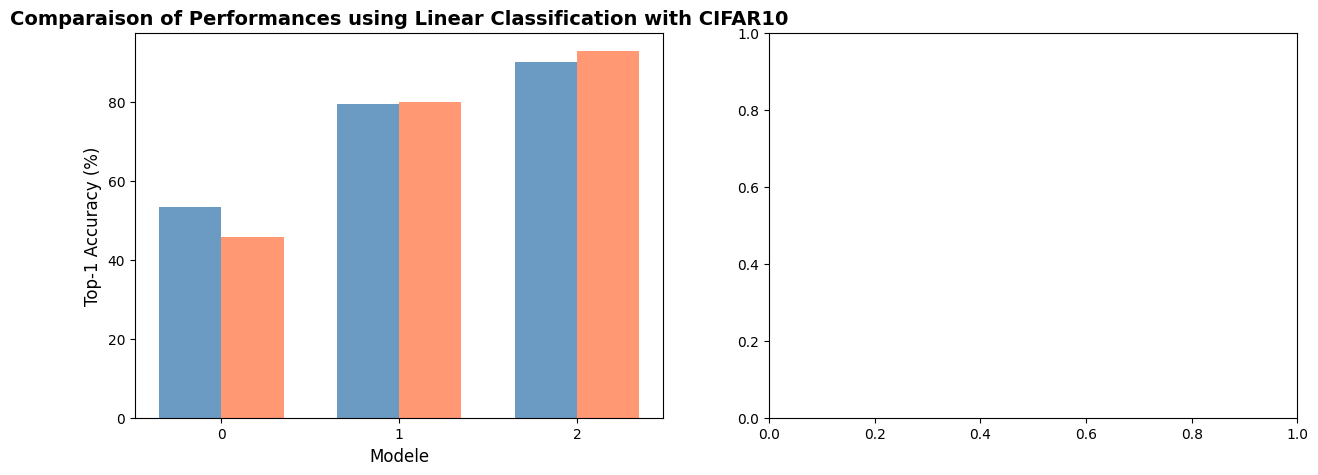

In [26]:
df = compare_all_models()

# Question 4

Comparaison with STL10 dataset

In [27]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [28]:
def compare_models_on_stl10():
    print("=" * 80)
    print("COMPARAISON WITH DATASET STL10")
    print("=" * 80)

    models_info = {
        'context_encoder': 'Context Encoder',
        'rotation': 'Rotation Prediction',
        'simclr': 'SimCLR'
    }

    results_stl10 = []

    for model_name, model_display_name in models_info.items():
        print(f"\n{'='*60}")
        print(f"Evaluation of {model_display_name} on STL10")
        print(f"{'='*60}")

        if model_name == 'context_encoder':
            resize_size = 128  # Context Encoder needs 128x128
        else:
            resize_size = 32   # Others work with 32x32

        # transformations
        transform = transforms.Compose([
            transforms.Resize(resize_size),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

        train_dataset = datasets.STL10(root='./data', split='train',
                                        download=True, transform=transform)
        test_dataset = datasets.STL10(root='./data', split='test',
                                      download=True, transform=transform)

        train_loader = DataLoader(train_dataset, batch_size=128,
                                  shuffle=True, num_workers=2)
        test_loader = DataLoader(test_dataset, batch_size=128,
                                shuffle=False, num_workers=2)

        print(f"Train samples: {len(train_dataset)}")
        print(f"Test samples: {len(test_dataset)}")

        # load pre-trained models
        model, _, _, _ = load_model_and_data(model_name)

        # create a classifier STL10 (10 classes)
        linear_classifier = model.construct_classifier()

        if torch.cuda.is_available():
            model = model.cuda()
            linear_classifier = linear_classifier.cuda()

        # traiining
        optimizer = torch.optim.Adam(linear_classifier.parameters(), lr=1e-3)
        criterion = nn.CrossEntropyLoss()

        print("\n Traiining...")
        model.eval()  # Evaluation mode

        num_epochs = 20
        for epoch in range(num_epochs):
            linear_classifier.train()
            running_loss = 0.0
            correct = 0
            total = 0

            pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
            for images, labels in pbar:
                if torch.cuda.is_available():
                    images, labels = images.cuda(), labels.cuda()

                with torch.no_grad():
                    if model_name == 'simclr':
                        features = model.encode(images)
                    else:
                        _, features = model(images)

                    if len(features.shape) > 2:
                        features = features.view(features.size(0), -1)

                # Forward pass
                outputs = linear_classifier(features)
                loss = criterion(outputs, labels)

                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                # Statistics
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                pbar.set_postfix({
                    'loss': f'{running_loss/(pbar.n+1):.4f}',
                    'acc': f'{100*correct/total:.2f}%'
                })

            train_acc = 100 * correct / total
            print(f"Epoch {epoch+1}/{num_epochs} - Train Acc: {train_acc:.2f}%")

        # evaluation ontest set
        print("\nEvaluation on the test-set...")
        linear_classifier.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in tqdm(test_loader, desc='Testing'):
                if torch.cuda.is_available():
                    images, labels = images.cuda(), labels.cuda()

                # Extraire les features
                if model_name == 'simclr':
                    features = model.encode(images)
                else:
                    _, features = model(images)

                # Flatten si nécessaire
                if len(features.shape) > 2:
                    features = features.view(features.size(0), -1)

                outputs = linear_classifier(features)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        print(f"\nTest Accuracy: {test_acc:.2f}%\n")

        results_stl10.append({
            'Modele': model_display_name,
            'Dataset': 'STL10',
            'Test Accuracy': test_acc
        })

    # results
    df_stl10 = pd.DataFrame(results_stl10)
    print("\n" + "=" * 30)
    print("Final Results")
    print("=" * 30)
    print(df_stl10.to_string(index=False))
    print("=" * 30)

    # Visualisation
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    bars = ax.bar(df_stl10['Modele'], df_stl10['Test Accuracy'],
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

    ax.set_xlabel('Modele', fontsize=12, fontweight='bold')
    ax.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
    ax.set_title('Comparaison of Self-Supervised Models sur STL10',
                  fontsize=14, fontweight='bold')
    ax.set_xticklabels(df_stl10['Modele'], rotation=15, ha='right')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 100])

    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.2f}%',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.savefig('model_comparison_stl10.png', dpi=300, bbox_inches='tight')
    plt.show()

    return df_stl10

COMPARAISON WITH DATASET STL10

Evaluation of Context Encoder on STL10


100%|██████████| 2.64G/2.64G [03:21<00:00, 13.1MB/s]


Train samples: 5000
Test samples: 8000


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



 Traiining...


Epoch 1/20: 100%|██████████| 40/40 [00:07<00:00,  5.44it/s, loss=1.8371, acc=34.08%]


Epoch 1/20 - Train Acc: 34.08%


Epoch 2/20: 100%|██████████| 40/40 [00:07<00:00,  5.08it/s, loss=1.3433, acc=51.68%]


Epoch 2/20 - Train Acc: 51.68%


Epoch 3/20: 100%|██████████| 40/40 [00:07<00:00,  5.53it/s, loss=1.2032, acc=58.24%]


Epoch 3/20 - Train Acc: 58.24%


Epoch 4/20: 100%|██████████| 40/40 [00:07<00:00,  5.48it/s, loss=1.1152, acc=61.70%]


Epoch 4/20 - Train Acc: 61.70%


Epoch 5/20: 100%|██████████| 40/40 [00:07<00:00,  5.23it/s, loss=1.0184, acc=63.72%]


Epoch 5/20 - Train Acc: 63.72%


Epoch 6/20: 100%|██████████| 40/40 [00:07<00:00,  5.56it/s, loss=0.9422, acc=68.40%]


Epoch 6/20 - Train Acc: 68.40%


Epoch 7/20: 100%|██████████| 40/40 [00:07<00:00,  5.15it/s, loss=0.8573, acc=70.92%]


Epoch 7/20 - Train Acc: 70.92%


Epoch 8/20: 100%|██████████| 40/40 [00:07<00:00,  5.56it/s, loss=0.8080, acc=73.40%]


Epoch 8/20 - Train Acc: 73.40%


Epoch 9/20: 100%|██████████| 40/40 [00:07<00:00,  5.01it/s, loss=0.7488, acc=76.52%]


Epoch 9/20 - Train Acc: 76.52%


Epoch 10/20: 100%|██████████| 40/40 [00:07<00:00,  5.30it/s, loss=0.7221, acc=77.24%]


Epoch 10/20 - Train Acc: 77.24%


Epoch 11/20: 100%|██████████| 40/40 [00:07<00:00,  5.25it/s, loss=0.6750, acc=79.10%]


Epoch 11/20 - Train Acc: 79.10%


Epoch 12/20: 100%|██████████| 40/40 [00:07<00:00,  5.07it/s, loss=0.6453, acc=80.40%]


Epoch 12/20 - Train Acc: 80.40%


Epoch 13/20: 100%|██████████| 40/40 [00:07<00:00,  5.49it/s, loss=0.5948, acc=81.70%]


Epoch 13/20 - Train Acc: 81.70%


Epoch 14/20: 100%|██████████| 40/40 [00:08<00:00,  4.95it/s, loss=0.5645, acc=84.20%]


Epoch 14/20 - Train Acc: 84.20%


Epoch 15/20: 100%|██████████| 40/40 [00:07<00:00,  5.34it/s, loss=0.5503, acc=84.28%]


Epoch 15/20 - Train Acc: 84.28%


Epoch 16/20: 100%|██████████| 40/40 [00:07<00:00,  5.00it/s, loss=0.5594, acc=85.26%]


Epoch 16/20 - Train Acc: 85.26%


Epoch 17/20: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s, loss=0.5173, acc=85.78%]


Epoch 17/20 - Train Acc: 85.78%


Epoch 18/20: 100%|██████████| 40/40 [00:07<00:00,  5.26it/s, loss=0.4610, acc=87.84%]


Epoch 18/20 - Train Acc: 87.84%


Epoch 19/20: 100%|██████████| 40/40 [00:08<00:00,  4.93it/s, loss=0.4542, acc=88.72%]


Epoch 19/20 - Train Acc: 88.72%


Epoch 20/20: 100%|██████████| 40/40 [00:07<00:00,  5.18it/s, loss=0.4432, acc=88.20%]


Epoch 20/20 - Train Acc: 88.20%

Evaluation on the test-set...


Testing: 100%|██████████| 63/63 [00:12<00:00,  5.22it/s]



Test Accuracy: 39.98%


Evaluation of Rotation Prediction on STL10
Train samples: 5000
Test samples: 8000

 Traiining...


Epoch 1/20: 100%|██████████| 40/40 [00:03<00:00, 10.91it/s, loss=1.1760, acc=62.30%]


Epoch 1/20 - Train Acc: 62.30%


Epoch 2/20: 100%|██████████| 40/40 [00:03<00:00, 11.35it/s, loss=0.3067, acc=89.78%]


Epoch 2/20 - Train Acc: 89.78%


Epoch 3/20: 100%|██████████| 40/40 [00:03<00:00, 10.19it/s, loss=0.1585, acc=96.26%]


Epoch 3/20 - Train Acc: 96.26%


Epoch 4/20: 100%|██████████| 40/40 [00:04<00:00,  9.99it/s, loss=0.1206, acc=97.60%]


Epoch 4/20 - Train Acc: 97.60%


Epoch 5/20: 100%|██████████| 40/40 [00:03<00:00, 11.31it/s, loss=0.0773, acc=98.30%]


Epoch 5/20 - Train Acc: 98.30%


Epoch 6/20: 100%|██████████| 40/40 [00:03<00:00, 11.38it/s, loss=0.0418, acc=99.68%]


Epoch 6/20 - Train Acc: 99.68%


Epoch 7/20: 100%|██████████| 40/40 [00:04<00:00,  8.82it/s, loss=0.0510, acc=99.06%]


Epoch 7/20 - Train Acc: 99.06%


Epoch 8/20: 100%|██████████| 40/40 [00:03<00:00, 11.28it/s, loss=0.0915, acc=97.20%]


Epoch 8/20 - Train Acc: 97.20%


Epoch 9/20: 100%|██████████| 40/40 [00:03<00:00, 11.24it/s, loss=0.0316, acc=99.54%]


Epoch 9/20 - Train Acc: 99.54%


Epoch 10/20: 100%|██████████| 40/40 [00:04<00:00,  9.82it/s, loss=0.0267, acc=99.64%]


Epoch 10/20 - Train Acc: 99.64%


Epoch 11/20: 100%|██████████| 40/40 [00:03<00:00, 10.29it/s, loss=0.0331, acc=99.32%]


Epoch 11/20 - Train Acc: 99.32%


Epoch 12/20: 100%|██████████| 40/40 [00:03<00:00, 10.99it/s, loss=0.0138, acc=99.80%]


Epoch 12/20 - Train Acc: 99.80%


Epoch 13/20: 100%|██████████| 40/40 [00:03<00:00, 11.03it/s, loss=0.0167, acc=99.80%]


Epoch 13/20 - Train Acc: 99.80%


Epoch 14/20: 100%|██████████| 40/40 [00:04<00:00,  8.86it/s, loss=0.0605, acc=99.08%]


Epoch 14/20 - Train Acc: 99.08%


Epoch 15/20: 100%|██████████| 40/40 [00:03<00:00, 11.26it/s, loss=0.0782, acc=97.66%]


Epoch 15/20 - Train Acc: 97.66%


Epoch 16/20: 100%|██████████| 40/40 [00:03<00:00, 11.21it/s, loss=0.0289, acc=99.44%]


Epoch 16/20 - Train Acc: 99.44%


Epoch 17/20: 100%|██████████| 40/40 [00:04<00:00,  8.97it/s, loss=0.0240, acc=99.34%]


Epoch 17/20 - Train Acc: 99.34%


Epoch 18/20: 100%|██████████| 40/40 [00:03<00:00, 11.15it/s, loss=0.0212, acc=99.86%]


Epoch 18/20 - Train Acc: 99.86%


Epoch 19/20: 100%|██████████| 40/40 [00:03<00:00, 11.03it/s, loss=0.0794, acc=97.78%]


Epoch 19/20 - Train Acc: 97.78%


Epoch 20/20: 100%|██████████| 40/40 [00:03<00:00, 10.78it/s, loss=0.0900, acc=97.52%]


Epoch 20/20 - Train Acc: 97.52%

Evaluation on the test-set...


Testing: 100%|██████████| 63/63 [00:06<00:00, 10.19it/s]



Test Accuracy: 68.46%


Evaluation of SimCLR on STL10
Train samples: 5000
Test samples: 8000

 Traiining...


Epoch 1/20: 100%|██████████| 40/40 [00:05<00:00,  7.34it/s, loss=1.3743, acc=60.30%]


Epoch 1/20 - Train Acc: 60.30%


Epoch 2/20: 100%|██████████| 40/40 [00:05<00:00,  7.29it/s, loss=0.7957, acc=74.10%]


Epoch 2/20 - Train Acc: 74.10%


Epoch 3/20: 100%|██████████| 40/40 [00:05<00:00,  7.51it/s, loss=0.7026, acc=75.74%]


Epoch 3/20 - Train Acc: 75.74%


Epoch 4/20: 100%|██████████| 40/40 [00:05<00:00,  7.20it/s, loss=0.6523, acc=77.26%]


Epoch 4/20 - Train Acc: 77.26%


Epoch 5/20: 100%|██████████| 40/40 [00:05<00:00,  7.46it/s, loss=0.6422, acc=77.62%]


Epoch 5/20 - Train Acc: 77.62%


Epoch 6/20: 100%|██████████| 40/40 [00:05<00:00,  7.12it/s, loss=0.6054, acc=78.84%]


Epoch 6/20 - Train Acc: 78.84%


Epoch 7/20: 100%|██████████| 40/40 [00:05<00:00,  7.33it/s, loss=0.6025, acc=78.98%]


Epoch 7/20 - Train Acc: 78.98%


Epoch 8/20: 100%|██████████| 40/40 [00:05<00:00,  7.28it/s, loss=0.5905, acc=79.94%]


Epoch 8/20 - Train Acc: 79.94%


Epoch 9/20: 100%|██████████| 40/40 [00:05<00:00,  6.97it/s, loss=0.5622, acc=80.16%]


Epoch 9/20 - Train Acc: 80.16%


Epoch 10/20: 100%|██████████| 40/40 [00:05<00:00,  7.35it/s, loss=0.5427, acc=80.54%]


Epoch 10/20 - Train Acc: 80.54%


Epoch 11/20: 100%|██████████| 40/40 [00:05<00:00,  7.07it/s, loss=0.5321, acc=81.30%]


Epoch 11/20 - Train Acc: 81.30%


Epoch 12/20: 100%|██████████| 40/40 [00:05<00:00,  7.40it/s, loss=0.5388, acc=81.08%]


Epoch 12/20 - Train Acc: 81.08%


Epoch 13/20: 100%|██████████| 40/40 [00:05<00:00,  7.19it/s, loss=0.5328, acc=81.06%]


Epoch 13/20 - Train Acc: 81.06%


Epoch 14/20: 100%|██████████| 40/40 [00:05<00:00,  7.26it/s, loss=0.5250, acc=81.32%]


Epoch 14/20 - Train Acc: 81.32%


Epoch 15/20: 100%|██████████| 40/40 [00:05<00:00,  7.37it/s, loss=0.5093, acc=81.86%]


Epoch 15/20 - Train Acc: 81.86%


Epoch 16/20: 100%|██████████| 40/40 [00:05<00:00,  7.01it/s, loss=0.5176, acc=82.10%]


Epoch 16/20 - Train Acc: 82.10%


Epoch 17/20: 100%|██████████| 40/40 [00:05<00:00,  7.44it/s, loss=0.5156, acc=82.12%]


Epoch 17/20 - Train Acc: 82.12%


Epoch 18/20: 100%|██████████| 40/40 [00:05<00:00,  7.15it/s, loss=0.5262, acc=81.82%]


Epoch 18/20 - Train Acc: 81.82%


Epoch 19/20: 100%|██████████| 40/40 [00:05<00:00,  7.41it/s, loss=0.5277, acc=81.94%]


Epoch 19/20 - Train Acc: 81.94%


Epoch 20/20: 100%|██████████| 40/40 [00:05<00:00,  7.18it/s, loss=0.4861, acc=82.28%]


Epoch 20/20 - Train Acc: 82.28%

Evaluation on the test-set...


Testing: 100%|██████████| 63/63 [00:08<00:00,  7.40it/s]
/tmp/ipython-input-189356171.py:159: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_stl10['Modele'], rotation=15, ha='right')



Test Accuracy: 79.44%


Final Results
             Modele Dataset  Test Accuracy
    Context Encoder   STL10        39.9750
Rotation Prediction   STL10        68.4625
             SimCLR   STL10        79.4375


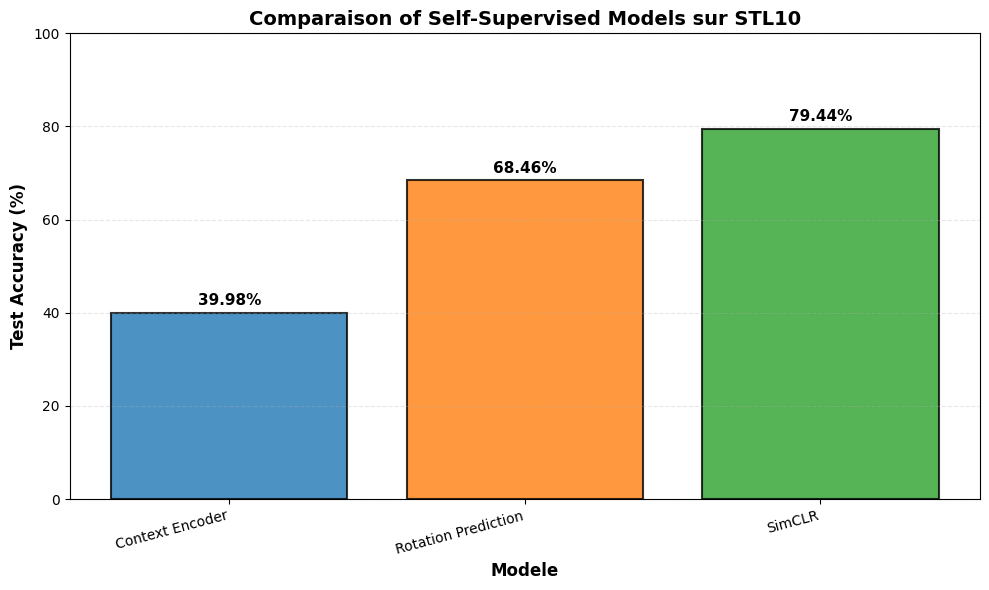

Modele Dataset  Test Accuracy
0      Context Encoder   STL10        39.9750
1  Rotation Prediction   STL10        68.4625
2               SimCLR   STL10        79.4375

In [31]:
compare_models_on_stl10()

# Question 5

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

class ContextPrediction(nn.Module):
    metrics = ['Loss', 'Acc1']
    metrics_fmt = [':.4e', ':6.2f']

    def __init__(self, dataset, n_classes):
        super().__init__()

        if dataset == 'cifar10':
            self.patch_size = 10  # Smaller patches for 32×32 images
            self.gap = 2
            self.jitter = 1
        else:
            self.patch_size = 96
            self.gap = 48
            self.jitter = 7

        # Encoder adapted to patch size
        if dataset == 'cifar10':
            # For 10×10 patches
            self.encoder = nn.Sequential(
                nn.Conv2d(3, 64, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(64, 128, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(2, stride=2),
                nn.Conv2d(128, 256, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
            )
            self.latent_dim = 256 * 5 * 5
            self.fc_dim = 512  # Smaller for CIFAR
        else:
            self.encoder = nn.Sequential(
                nn.Conv2d(3, 96, kernel_size=11, stride=4),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(3, stride=2),
                nn.Conv2d(96, 256, kernel_size=5, padding=2),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(3, stride=2),
                nn.Conv2d(256, 384, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(384, 384, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(384, 256, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(3, stride=2),
            )
            self.latent_dim = 256 * 2 * 2
            self.fc_dim = 4096

        self.fc6 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.latent_dim, self.fc_dim),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5)
        )

        self.fc7 = nn.Sequential(
            nn.Linear(self.fc_dim * 2, self.fc_dim),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5)
        )

        self.fc8 = nn.Linear(self.fc_dim, 8)  # 8 spatial configurations

        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        classifier = nn.Sequential(
            nn.BatchNorm1d(self.fc_dim, affine=False),
            nn.Linear(self.fc_dim, self.n_classes)
        )
        return classifier

    def forward(self, images):
        patch1, patch2, targets = self._sample_patch_pairs(images)

        z1 = self.fc6(self.encoder(patch1))
        z2 = self.fc6(self.encoder(patch2))

        z = torch.cat([z1, z2], dim=1)
        z = self.fc7(z)
        logits = self.fc8(z)

        loss = F.cross_entropy(logits, targets)
        pred = logits.argmax(dim=-1)
        acc = pred.eq(targets).float().mean() * 100.

        return dict(Loss=loss, Acc1=acc), z1

    def encode(self, images):
        # Use center patch for encoding
        _, _, H, W = images.shape
        h_start = (H - self.patch_size) // 2
        w_start = (W - self.patch_size) // 2
        patch = images[:, :, h_start:h_start+self.patch_size, w_start:w_start+self.patch_size]
        return self.fc6(self.encoder(patch))

    def _sample_patch_pairs(self, images):
        B, C, H, W = images.shape
        patch_size = self.patch_size
        gap = self.gap
        jitter = self.jitter

        # 8 relative positions
        positions = [
            (-1, -1), (-1, 0), (-1, 1),  # top row
            (0, -1),           (0, 1),    # middle row (left, right)
            (1, -1),  (1, 0),  (1, 1)     # bottom row
        ]

        patch1_list, patch2_list, targets = [], [], []

        # Calculate valid range for first patch
        # Need space for: patch1 + gap + patch2
        max_y = H - (2 * patch_size + gap)
        max_x = W - (2 * patch_size + gap)

        for i in range(B):
            # Sample position for first patch (with room for second patch)
            y1 = random.randint(0, max(0, max_y))
            x1 = random.randint(0, max(0, max_x))

            # Sample one of 8 relative positions
            rel_pos = random.randint(0, 7)
            dy, dx = positions[rel_pos]

            # Calculate second patch position
            y2 = y1 + dy * (patch_size + gap)
            x2 = x1 + dx * (patch_size + gap)

            # Add jitter to both patches
            y1 = max(0, min(H - patch_size, y1 + random.randint(-jitter, jitter)))
            x1 = max(0, min(W - patch_size, x1 + random.randint(-jitter, jitter)))
            y2 = max(0, min(H - patch_size, y2 + random.randint(-jitter, jitter)))
            x2 = max(0, min(W - patch_size, x2 + random.randint(-jitter, jitter)))

            # Extract patches
            p1 = images[i:i+1, :, y1:y1+patch_size, x1:x1+patch_size]
            p2 = images[i:i+1, :, y2:y2+patch_size, x2:x2+patch_size]

            patch1_list.append(p1)
            patch2_list.append(p2)
            targets.append(rel_pos)

        patch1 = torch.cat(patch1_list, dim=0)
        patch2 = torch.cat(patch2_list, dim=0)
        targets = torch.tensor(targets, device=images.device)

        return patch1, patch2, targets

In [33]:
# preparing the training loop

import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ContextPrediction('cifar10', n_classes=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=128, shuffle=False)

# early stopping parameters
best_val_loss = float('inf')
patience = 5
patience_counter = 0

# === TRACKING HISTORY ===
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'epochs': []
}

model.train()
for epoch in range(100):
    # Training
    total_loss = 0
    total_acc = 0

    model.train()
    for batch_idx, (images, _) in enumerate(train_loader):
        images = images.to(device)

        optimizer.zero_grad()
        metrics, _ = model(images)
        loss = metrics['Loss']
        acc = metrics['Acc1']

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_acc += acc.item()

        if batch_idx % 50 == 0:
            print(f'Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}, Acc: {acc.item():.2f}%')

    avg_train_loss = total_loss / len(train_loader)
    avg_train_acc = total_acc / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0
    val_acc = 0
    with torch.no_grad():
        for images, _ in val_loader:
            images = images.to(device)
            metrics, _ = model(images)
            val_loss += metrics['Loss'].item()
            val_acc += metrics['Acc1'].item()

    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc = val_acc / len(val_loader)

    # === Updating History dict ===
    history['train_loss'].append(avg_train_loss)
    history['train_acc'].append(avg_train_acc)
    history['val_loss'].append(avg_val_loss)
    history['val_acc'].append(avg_val_acc)
    history['epochs'].append(epoch + 1)

    print(f'Epoch {epoch+1} : Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.2f}% | Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.2f}%')

    # early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'context_prediction_best.pth')
        print(f'Saved best model (val_loss: {best_val_loss:.4f})\n')
    else:
        patience_counter += 1
        print(f'No improvement ({patience_counter}/{patience})\n')

        if patience_counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

Epoch 1, Batch 0, Loss: 2.0821, Acc: 11.72%
Epoch 1, Batch 50, Loss: 2.0060, Acc: 17.97%
Epoch 1, Batch 100, Loss: 2.0291, Acc: 10.94%
Epoch 1, Batch 150, Loss: 1.9235, Acc: 21.88%
Epoch 1, Batch 200, Loss: 1.8739, Acc: 24.22%
Epoch 1, Batch 250, Loss: 1.8893, Acc: 21.88%
Epoch 1, Batch 300, Loss: 1.7920, Acc: 29.69%
Epoch 1, Batch 350, Loss: 1.9055, Acc: 34.38%
Epoch 1 : Train Loss: 1.9376, Train Acc: 21.33% | Val Loss: 1.7959, Val Acc: 28.65%
Saved best model (val_loss: 1.7959)

Epoch 2, Batch 0, Loss: 1.7777, Acc: 27.34%
Epoch 2, Batch 50, Loss: 1.6878, Acc: 34.38%
Epoch 2, Batch 100, Loss: 1.7617, Acc: 26.56%
Epoch 2, Batch 150, Loss: 1.7204, Acc: 37.50%
Epoch 2, Batch 200, Loss: 1.8047, Acc: 30.47%
Epoch 2, Batch 250, Loss: 1.7411, Acc: 29.69%
Epoch 2, Batch 300, Loss: 1.7067, Acc: 30.47%
Epoch 2, Batch 350, Loss: 1.7465, Acc: 33.59%
Epoch 2 : Train Loss: 1.7750, Train Acc: 29.73% | Val Loss: 1.6914, Val Acc: 32.97%
Saved best model (val_loss: 1.6914)

Epoch 3, Batch 0, Loss: 1.83

Loaded best model from training


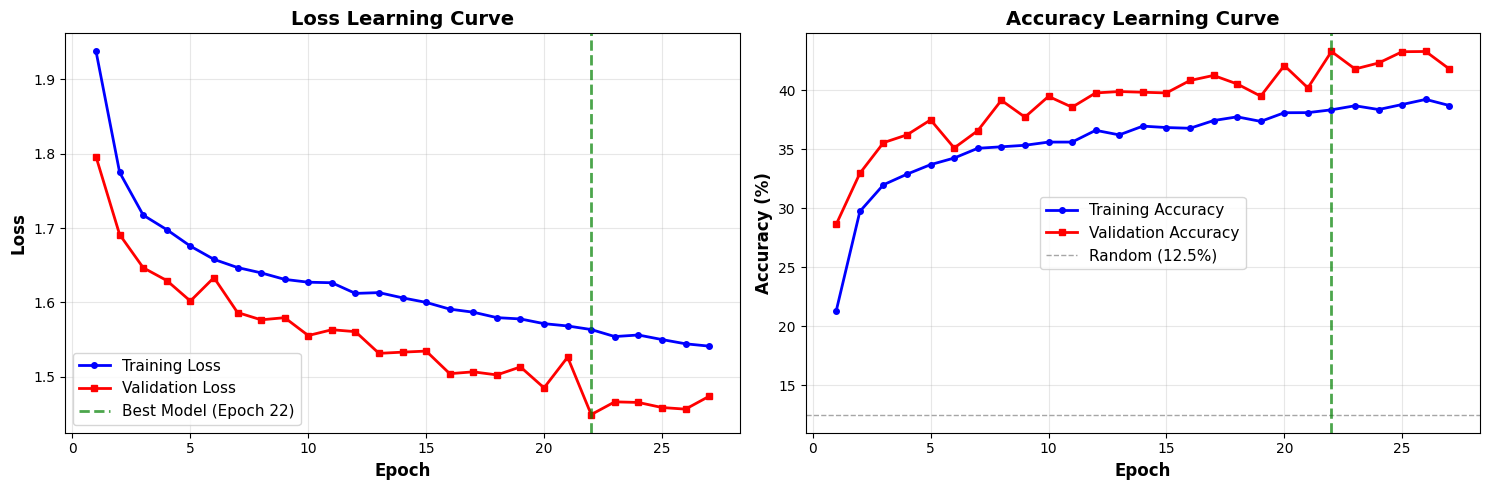


TRAINING SUMMARY
Total Epochs: 27
Best Epoch: 22
Best Val Loss: 1.4492
Best Val Acc: 43.30%
Final Train Loss: 1.5413
Final Train Acc: 38.72%
Final Val Loss: 1.4738
Final Val Acc: 41.82%


In [34]:
#Visualisation

# Load best model
model.load_state_dict(torch.load('context_prediction_best.pth'))
print("Loaded best model from training")

# === PLOT LEARNING CURVES ===
def plot_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    epochs = history['epochs']

    # Loss plot
    ax1.plot(epochs, history['train_loss'], 'b-o', label='Training Loss', linewidth=2, markersize=4)
    ax1.plot(epochs, history['val_loss'], 'r-s', label='Validation Loss', linewidth=2, markersize=4)
    ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
    ax1.set_title('Loss Learning Curve', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)

    # Find best epoch
    best_epoch = epochs[history['val_loss'].index(min(history['val_loss']))]
    ax1.axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Best Model (Epoch {best_epoch})')
    ax1.legend(fontsize=11)

    # Accuracy plot
    ax2.plot(epochs, history['train_acc'], 'b-o', label='Training Accuracy', linewidth=2, markersize=4)
    ax2.plot(epochs, history['val_acc'], 'r-s', label='Validation Accuracy', linewidth=2, markersize=4)
    ax2.axhline(y=12.5, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='Random (12.5%)')
    ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Accuracy Learning Curve', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    ax2.axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7)

    plt.tight_layout()
    plt.savefig('learning_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print summary
    print("\n" + "="*60)
    print("TRAINING SUMMARY")
    print("="*60)
    print(f"Total Epochs: {len(epochs)}")
    print(f"Best Epoch: {best_epoch}")
    print(f"Best Val Loss: {min(history['val_loss']):.4f}")
    print(f"Best Val Acc: {max(history['val_acc']):.2f}%")
    print(f"Final Train Loss: {history['train_loss'][-1]:.4f}")
    print(f"Final Train Acc: {history['train_acc'][-1]:.2f}%")
    print(f"Final Val Loss: {history['val_loss'][-1]:.4f}")
    print(f"Final Val Acc: {history['val_acc'][-1]:.2f}%")

plot_learning_curves(history)

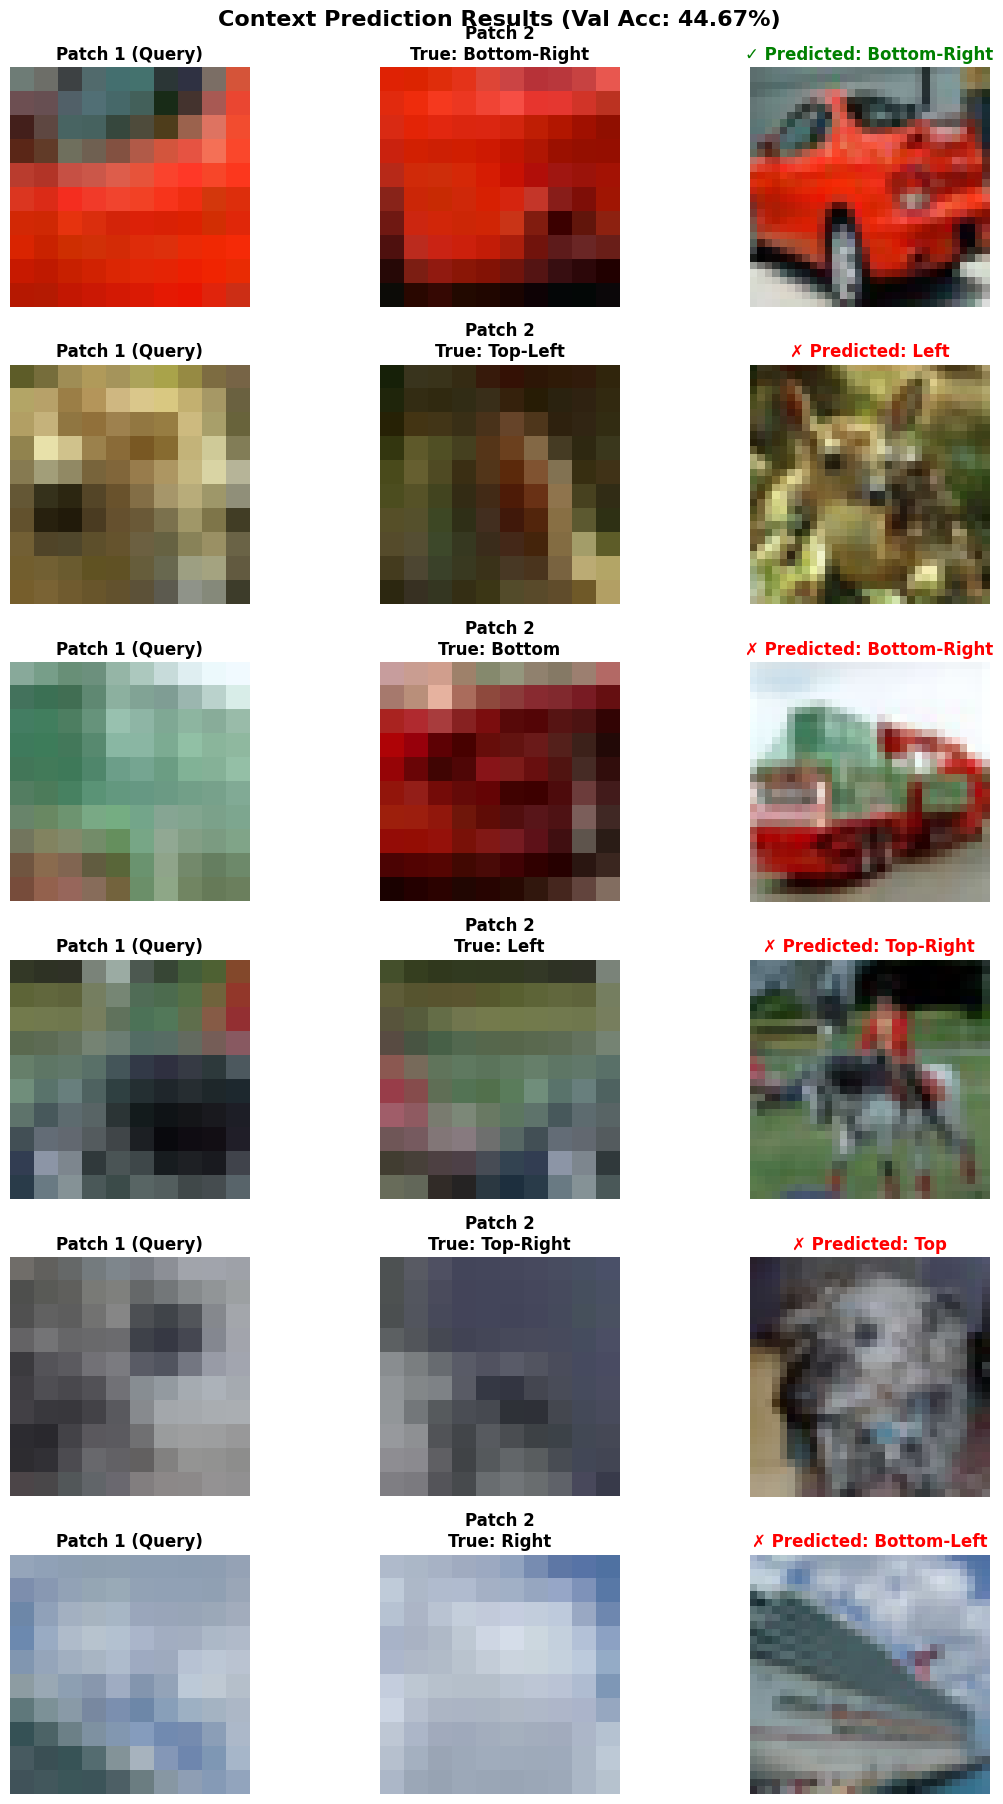

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the context prediction task with predictions for N samples
def visualize_context_prediction(model, test_loader, n_examples=6):
    model.eval()

    # Position names for 8 configurations
    pos_names = ['Top-Left', 'Top', 'Top-Right',
                 'Left', 'Right',
                 'Bottom-Left', 'Bottom', 'Bottom-Right']

    # Get some test images
    images, _ = next(iter(test_loader))
    images = images[:n_examples].to(device)

    with torch.no_grad():
        fig, axes = plt.subplots(n_examples, 3, figsize=(12, 3*n_examples))
        if n_examples == 1:
            axes = axes.reshape(1, -1)

        for i in range(n_examples):
            img = images[i:i+1]

            # Sample patch pair
            patch1, patch2, target = model._sample_patch_pairs(img)

            # Get prediction
            z1 = model.fc6(model.encoder(patch1))
            z2 = model.fc6(model.encoder(patch2))
            z = torch.cat([z1, z2], dim=1)
            z = model.fc7(z)
            logits = model.fc8(z)
            pred = logits.argmax(dim=-1).item()
            target_pos = target.item()

            # Denormalize patches for display
            def denormalize(tensor):
                tensor = tensor.cpu().squeeze().permute(1, 2, 0).numpy()
                tensor = tensor * 0.5 + 0.5  # Reverse normalize
                return np.clip(tensor, 0, 1)

            patch1_np = denormalize(patch1)
            patch2_np = denormalize(patch2)
            img_np = denormalize(img)

            # Show patches and prediction
            axes[i, 0].imshow(patch1_np)
            axes[i, 0].set_title('Patch 1 (Query)', fontsize=12, fontweight='bold')
            axes[i, 0].axis('off')
            axes[i, 0].set_facecolor('#f0f0f0')

            axes[i, 1].imshow(patch2_np)
            correct = '✓' if pred == target_pos else '✗'
            color = 'green' if pred == target_pos else 'red'
            axes[i, 1].set_title(f'Patch 2\nTrue: {pos_names[target_pos]}',
                                fontsize=12, fontweight='bold')
            axes[i, 1].axis('off')
            axes[i, 1].set_facecolor('#f0f0f0')

            axes[i, 2].imshow(img_np)
            axes[i, 2].set_title(f'{correct} Predicted: {pos_names[pred]}',
                                fontsize=12, fontweight='bold', color=color)
            axes[i, 2].axis('off')

        plt.tight_layout()
        plt.suptitle(f'Context Prediction Results (Val Acc: 44.67%)',
                    fontsize=16, fontweight='bold', y=1.00)
        plt.show()

# Load test data
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Visualize predictions
visualize_context_prediction(model, test_loader, n_examples=6)